# Variable bins limits

**Goal:** We were having some issues with convergence for the limits that we're showing - so we were curious how far we could get just with a variable width resolution + fewer bins.

Since we were j trying to see "how close to prev #s" we could get, for now I'm just going to be showing results fr getting these limits *separately* haha.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pyhf
import os

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)


from crypto_utils import getTime

# os.sys.path.append('../stats-results/')
# from var_bins_studies import get_bin_edgs

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
bcats = ['4b','3b + 1 loose','3b + 1 fail']
idx = ['40 fixed width bins']+[f'res {ri}%' for ri in range(5,11)]
idx_all = pd.MultiIndex.from_product([bcats,idx])
cols = ['Just $m_{hh}$','$m_{hh}$ + 3 (uncorrelated) $\Delta \eta_{hh}$ cats','$m_{hh}$ + 3 (correlated) $\Delta \eta_{hh}$ cats']

time_df = pd.DataFrame(0,idx_all,cols)
fcall_df = pd.DataFrame(0,idx_all,cols)
lim_df = pd.DataFrame(0,idx_all,cols)

In [4]:
r=(275,1050)

In [5]:
def get_bin_edgs(r=(250,1100),res=.05):
    '''
    Goal: Return a list for the bin edges between X and Y 
    which use a fixed resolution (default 5% to match the baseline analysis).
    '''
    
    edgs = [r[0]]
    
    while edgs[-1] < r[1]:
        edgs.append( round((1+res)*edgs[-1]) )
    
    return edgs


In [6]:
for res in [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
    edg = get_bin_edgs(r,res=res)
    print(res,len(edg)-1,np.array(edg))

0.05 28 [ 275  289  303  318  334  351  369  387  406  426  447  469  492  517
  543  570  598  628  659  692  727  763  801  841  883  927  973 1022
 1073]
0.06 23 [ 275  292  310  329  349  370  392  416  441  467  495  525  556  589
  624  661  701  743  788  835  885  938  994 1054]
0.07 20 [ 275  294  315  337  361  386  413  442  473  506  541  579  620  663
  709  759  812  869  930  995 1065]
0.08 18 [ 275  297  321  347  375  405  437  472  510  551  595  643  694  750
  810  875  945 1021 1103]
0.09 16 [ 275  300  327  356  388  423  461  502  547  596  650  708  772  841
  917 1000 1090]
0.1 15 [ 275  302  332  365  402  442  486  535  588  647  712  783  861  947
 1042 1146]


In [6]:
for bcat, blab in zip(bcats,['4b','3b1l','3b1f']):
    for col,clab in zip(cols, ['incl','3_deta','3_deta_corr']):
        
        # fixed width bins 
        log_file = f'../stats-results/log_files/allYrs_{blab}_{clab}_jax.log'
        try:
            mins, fCalls,mu = getTime(log_file)
            
            i =idx[0]
            time_df.loc[(bcat,i),col] = mins
            fcall_df.loc[(bcat,i),col] = fCalls
            lim_df.loc[(bcat,i),col] = mu
        except FileNotFoundError:
            print(log_file, 'still converging')
        
        for i, res in zip(idx[1:],[0.05, 0.06, 0.07, 0.08, 0.09, 0.1]):

            edg = get_bin_edgs(r,res=res)
            label = f'{r[0]}_{r[1]}_res_' + f'{res}'.replace('.','p')
            #label = 'res_' + f'{res}'.replace('.','p')
            
            log_file = f'../stats-results/log_files/varBins_{blab}_{clab}_{res}.log'
            mins, fCalls,mu = getTime(log_file)
            #print(clab,res,mins,mu)
            
            time_df.loc[(bcat,i),col] = mins
            fcall_df.loc[(bcat,i),col] = fCalls
            lim_df.loc[(bcat,i),col] = mu

In [7]:
time_df.round(2)

Just $m_{hh}$  \
4b           40 fixed width bins           1.36   
             res 5%                        0.77   
             res 6%                        0.47   
             res 7%                        0.40   
             res 8%                        0.42   
             res 9%                        0.37   
             res 10%                       0.32   
3b + 1 loose 40 fixed width bins           1.49   
             res 5%                        0.89   
             res 6%                        0.55   
             res 7%                        0.59   
             res 8%                        0.51   
             res 9%                        0.43   
             res 10%                       0.38   
3b + 1 fail  40 fixed width bins           1.76   
             res 5%                        1.03   
             res 6%                        0.75   
             res 7%                        0.59   
             res 8%                        0.54   
             res 9%                        0.46   
             res 10%                       0.45   

                                  $m_{hh}$ + 3 (uncorrelated) $\Delta \eta_{hh}$ cats  \
4b           40 fixed width bins                                              24.92     
             res 5%                                                           12.75     
             res 6%                                                            8.01     
             res 7%                                                            5.73     
             res 8%                                                            4.49     
             res 9%                                                            3.46     
             res 10%                                                           3.13     
3b + 1 loose 40 fixed width bins                                              35.44     
             res 5%                                                           27.56     
             res 6%                                                           11.95     
             res 7%                                                           24.03     
             res 8%                                                           18.93     
             res 9%                                                            4.38     
             res 10%                                                           3.89     
3b + 1 fail  40 fixed width bins                                              50.33     
             res 5%                                                           24.31     
             res 6%                                                           13.99     
             res 7%                                                            9.80     
             res 8%                                                            7.80     
             res 9%                                                            5.88     
             res 10%                                                           5.60     

                                  $m_{hh}$ + 3 (correlated) $\Delta \eta_{hh}$ cats  
4b           40 fixed width bins                                              19.13  
             res 5%                                                            8.05  
             res 6%                                                            4.94  
             res 7%                                                            3.53  
             res 8%                                                            2.87  
             res 9%                                                            2.21  
             res 10%                                                           1.99  
3b + 1 loose 40 fixed width bins                                              28.26  
             res 5%                                                           12.80  
             res 6%                                                            7.73  
      

In [8]:
lim_df.round(2)

Just $m_{hh}$  \
4b           40 fixed width bins           7.74   
             res 5%                        7.76   
             res 6%                        7.86   
             res 7%                        7.98   
             res 8%                        8.06   
             res 9%                        8.18   
             res 10%                       8.27   
3b + 1 loose 40 fixed width bins          23.38   
             res 5%                       23.40   
             res 6%                       23.70   
             res 7%                       23.94   
             res 8%                       24.17   
             res 9%                       24.42   
             res 10%                      24.61   
3b + 1 fail  40 fixed width bins          71.42   
             res 5%                       71.91   
             res 6%                       74.24   
             res 7%                       76.05   
             res 8%                       77.34   
             res 9%                       79.24   
             res 10%                      80.62   

                                  $m_{hh}$ + 3 (uncorrelated) $\Delta \eta_{hh}$ cats  \
4b           40 fixed width bins                                               6.58     
             res 5%                                                            6.62     
             res 6%                                                            6.67     
             res 7%                                                            6.71     
             res 8%                                                            6.75     
             res 9%                                                            6.80     
             res 10%                                                           6.83     
3b + 1 loose 40 fixed width bins                                              21.31     
             res 5%                                                           21.39     
             res 6%                                                           21.59     
             res 7%                                                           21.70     
             res 8%                                                           21.75     
             res 9%                                                           21.89     
             res 10%                                                          21.94     
3b + 1 fail  40 fixed width bins                                              51.29     
             res 5%                                                           51.66     
             res 6%                                                           52.42     
             res 7%                                                           53.12     
             res 8%                                                           53.67     
             res 9%                                                           54.35     
             res 10%                                                          54.94     

                                  $m_{hh}$ + 3 (correlated) $\Delta \eta_{hh}$ cats  
4b           40 fixed width bins                                               6.56  
             res 5%                                                            6.61  
             res 6%                                                            6.66  
             res 7%                                                            6.71  
             res 8%                                                            6.75  
             res 9%                                                            6.80  
             res 10%                                                           6.83  
3b + 1 loose 40 fixed width bins                                              20.61  
             res 5%                                                           20.68  
             res 6%                                                           20.85  
      

**Cool!** This looks awesome :D

Let's try to turn 4b into a plot now :)

In [9]:
time_df.loc['4b',col]

40 fixed width bins    19.134631
res 5%                  8.053302
res 6%                  4.937676
res 7%                  3.529365
res 8%                  2.873554
res 9%                  2.206303
res 10%                 1.992282
Name: $m_{hh}$ + 3 (correlated) $\Delta \eta_{hh}$ cats, dtype: float64

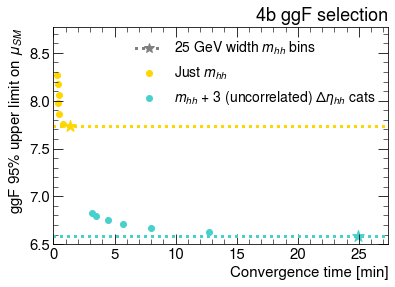

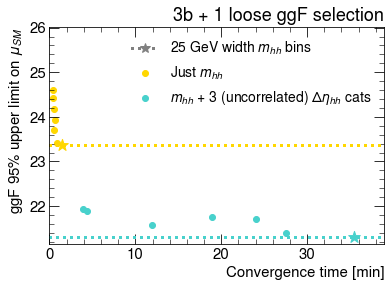

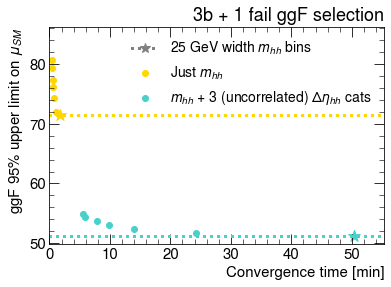

In [10]:
for bcat, blab in zip(bcats,['4b','3b1l','3b1f']):

    plt.figure()
    
    colors = ['gold','mediumturquoise'] #,'coral']

    for col,color in zip(cols,colors):

        plt.scatter(time_df.loc[bcat,col][1:],
                    lim_df.loc[bcat,col][1:],
                    color=color,label=col)

    max_time = time_df.loc[bcat].values.max()
    xlim = (0,1.1*max_time)
    
    for col,color in zip(cols,colors):
        yi = lim_df.loc[bcat,col][0]
        plt.scatter(time_df.loc[bcat,col][0],yi,color=color,
                    #label=col+'40 fixed width bins',
                    marker='*',s=150)
        plt.plot(xlim,yi* np.ones(2), 
                 color=color,ls='dotted')

    # Add a legend entry just for the fixed width bins?
    plt.plot([],[],color='grey',ls='dotted',marker='*',markersize=10,
             label='25 GeV width $m_{hh}$ bins')

    plt.xlabel('Convergence time [min]',loc='right')
    plt.ylabel('ggF 95% upper limit on $\mu_{SM}$',loc='top')
    plt.legend()#loc='center right')
    plt.title(f'{bcat} ggF selection',loc='right')
    plt.xlim(xlim)
    ylim = plt.ylim()
    plt.ylim(ylim[0],1.05*ylim[1])
    plt.savefig(f'figures/deta_cats/lim_vs_time_{blab}.pdf',bbox_inches='tight')

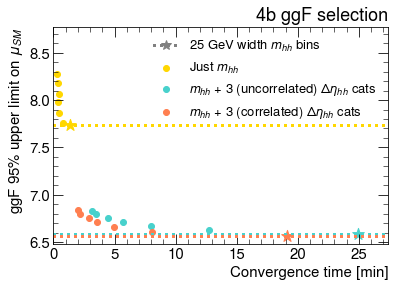

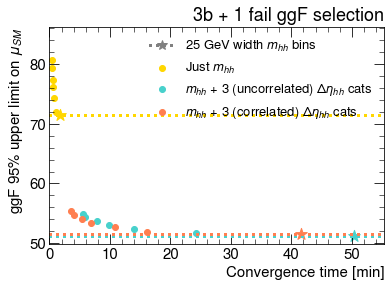

In [12]:
for bcat, blab in zip(bcats,['4b','3b1l','3b1f']):

    plt.figure()
    
    colors = ['gold','mediumturquoise','coral']

    for col,color in zip(cols,colors):

        plt.scatter(time_df.loc[bcat,col][1:],
                    lim_df.loc[bcat,col][1:],
                    color=color,label=col)

    max_time = time_df.loc[bcat].values.max()
    xlim = (0,1.1*max_time)
    
    for col,color in zip(cols,colors):
        yi = lim_df.loc[bcat,col][0]
        plt.scatter(time_df.loc[bcat,col][0],yi,color=color,
                    #label=col+'40 fixed width bins',
                    marker='*',s=150)
        plt.plot(xlim,yi* np.ones(2), 
                 color=color,ls='dotted')

    # Add a legend entry just for the fixed width bins?
    plt.plot([],[],color='grey',ls='dotted',marker='*',markersize=10,
             label='25 GeV width $m_{hh}$ bins')

    plt.xlabel('Convergence time [min]',loc='right')
    plt.ylabel('ggF 95% upper limit on $\mu_{SM}$',loc='top')
    plt.legend(fontsize=13)#loc='center right')
    plt.title(f'{bcat} ggF selection',loc='right')
    plt.xlim(xlim)
    ylim = plt.ylim()
    plt.ylim(ylim[0],1.05*ylim[1])
    plt.savefig(f'figures/deta_cats/lim_vs_time_corr_{blab}.pdf',bbox_inches='tight')

In [287]:
time_df.loc['4b']

Just $m_{hh}$  \
40 fixed width bins       1.360268   
res 5%                    0.774383   
res 6%                    0.473232   
res 7%                    0.398085   
res 8%                    0.415884   
res 9%                    0.374263   
res 10%                   0.317872   

                     $m_{hh}$ + 3 (uncorrelated) $\Delta \eta_{hh}$ cats  \
40 fixed width bins                                          24.917397     
res 5%                                                       12.753200     
res 6%                                                        8.012222     
res 7%                                                        5.730793     
res 8%                                                        4.487711     
res 9%                                                        3.457682     
res 10%                                                       3.129532     

                     $m_{hh}$ + 3 (correlated) $\Delta \eta_{hh}$ cats  
40 fixed width bins                                          19.134631  
res 5%                                                        8.053302  
res 6%                                                        4.937676  
res 7%                                                        3.529365  
res 8%                                                        2.873554  
res 9%                                                        2.206303  
res 10%                                                       1.992282

In [281]:
y[0]

6.583209727694326

**Next:** Let's visualize the % degradation in the limit from includeing fewer bins?

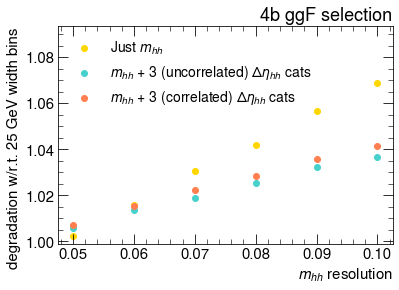

In [13]:
for bcat, blab in zip(bcats,['4b','3b1l','3b1f']):

    colors = ['gold','mediumturquoise','coral']

    plt.figure()
    for col,color in zip(cols,colors):
        plt.scatter([.05,.06,.07,.08,.09,.1],lim_df.loc[bcat,col][1:]/lim_df.loc[bcat,col][0],
                    color=color,label=col)


    plt.xlabel('$m_{hh}$ resolution',loc='right')
    plt.ylabel('degradation w/r.t. 25 GeV width bins',loc='top')
    plt.legend(loc='upper left')
    plt.title(f'{bcat} ggF selection',loc='right')

    ymin,ymax = plt.ylim()
    plt.ylim(ymin,1.02*ymax)
    
    plt.savefig(f'figures/deta_cats/lim_deg_vs_39_corr_{blab}.pdf',bbox_inches='tight')

Also interesting to visualize the min bin count (I think)?

Actually, Rui was saying that the more interesting metric to look at would be bin_err / bin_content (where bin_err is the stat error from the gamma factors).

In [14]:
def visErrs(ws_name, edg,title='',figDir='',tag=''):
    
    # Load in the ws
    with open(ws_name) as f:
        ws = json.load(f)
    
    # TO DO: Set the bin centers + widths
    e = np.array(edg)
    widths = e[1:] - e[:-1]
    xx = 0.5 * (e[1:] + e[:-1])
    
    gs = {'wspace':0.12, 'hspace':0.1}
    fig,axes = plt.subplots(3,3,figsize=(18,12),gridspec_kw=gs)

    deta_titles = [
        '$\Delta \eta_{hh}$ < 0.5',
        '0.5 < $\Delta \eta_{hh}$ < 1',
        '1 < $\Delta \eta_{hh}$ < 1.5'
    ]
       
    for i,ax_row,yr in zip(range(3),axes[::-1],[16,17,18]):
    
        for j,ax,ti in zip(range(3),ax_row,deta_titles):
                
            k = i*3+j

            bkg = ws['channels'][k]['samples'][1]
            assert bkg['name']  == f'background{yr}cat_4b_{j}'

            nom = np.array(bkg['data'])

            stat = np.array(bkg['modifiers'][0]['data'])
            
            low_HT_hists = [np.array(bkg['modifiers'][1]['data'][v]) for v in ['lo_data','hi_data']]
            high_HT_hists = [np.array(bkg['modifiers'][2]['data'][v]) for v in ['lo_data','hi_data']]
            
            low_HT  = np.where( low_HT_hists[0] >  low_HT_hists[1],  low_HT_hists[0],  low_HT_hists[1])
            high_HT = np.where(high_HT_hists[0] > high_HT_hists[1], high_HT_hists[0], high_HT_hists[1])
            
            
            ax.hist(xx,e,lw=4,histtype='step',
                    weights=stat/nom,color='green',label='BS + Pois 2b')
            ax.hist(xx,e,lw=4,histtype='step',
                    weights=low_HT/nom-1,color='navy',label='low $H_T$ shape')
            ax.hist(xx,e,lw=4,histtype='step',
                    weights=high_HT/nom-1,color='deeppink',label='high $H_T$ shape')
            
            _,ymax = ax.get_ylim()
            if ymax < 0.3:
                ax.set_ylim(0,0.3)
            
            if i ==0: ax.set_xlabel('$m_{hh}$ bins [arbitrary units]',loc='right')
            if j ==0: ax.set_ylabel('Relative error',loc='top')
            ax.text(.1,.95,ws['channels'][k]['name'][7:],ha='left',va='top',transform=ax.transAxes)
            ax.text(.1,.85,ti,ha='left',va='top',transform=ax.transAxes)
            ax.legend()
            
            
            
    fig.subplots
    axes[0,1].set_title(title,fontsize=24,pad=10)
    
    if tag:
        plt.savefig(f'{figDir}/relErr_3_deta_{tag}.pdf',bbox_inches='tight')
    
    plt.show()

In [15]:
res = 0.07
res_str = f'{r[0]}_{r[1]}_res_'+f'{res}'.replace('.','p')
ws_name = f'../stats-results/var_bins/ws-4b-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-{res_str}.json'
edg = get_bin_edgs(r,res=res)

visErrs(ws_name,edg,f'Variable width bins set with {int(res*100)}%'+' $m_{hh}$ resolution',
        figDir='figures/deta_cats/',tag=res_str)

In [265]:
len(edg)

21

In [264]:
edg

[275,
 294,
 315,
 337,
 361,
 386,
 413,
 442,
 473,
 506,
 541,
 579,
 620,
 663,
 709,
 759,
 812,
 869,
 930,
 995,
 1065]

**Last message plot** It would be *great* to viz the signal, background, and backgrounde error histograms as well ( I think ), since for 4b + 3b1l only the prefit will be meaningful (I believe?)